#Basic Activity

Solve the next exercises:

**1.** A mass connected to a spring is moved to an initial position A from where it is released. Then the mass starts moving, consider the initial time equal to zero. Find the evolution of the system considering that obeys the following expressions

\begin{eqnarray*}
X(t) &=& +A \cos(\omega t)\\
V(t) &=& -A\omega\sin(\omega t)\\
a(t) &=& -A\omega^2\cos(\omega t) 
\end{eqnarray*}


<img src="./figures/spring1.png">

Make a plot of the evolution of the position, velocity and acceleration of the system. Feel free to choose the parameters you prefer. 

It can be also shown that the potential and kinetic energy of the system is given by

\begin{eqnarray*}
E_p &=& \frac{1}{2}kX^2\\
E_k &=& \frac{1}{2}mV^2
\end{eqnarray*}

Make a plot of the potential energy and the total energy obtained for every step of the iteration. 


# Solution 1

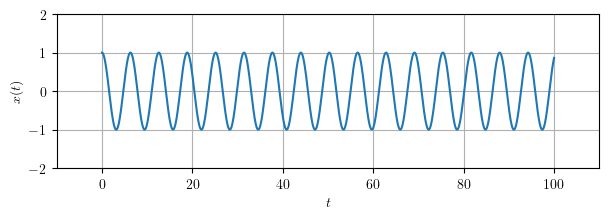

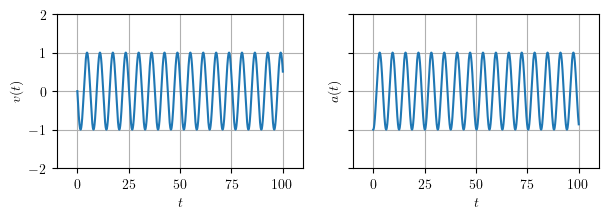

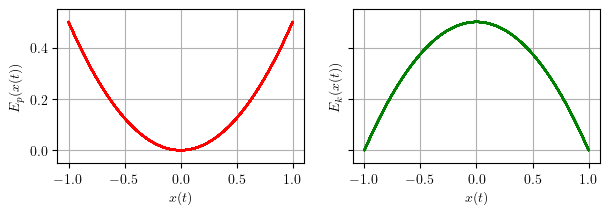

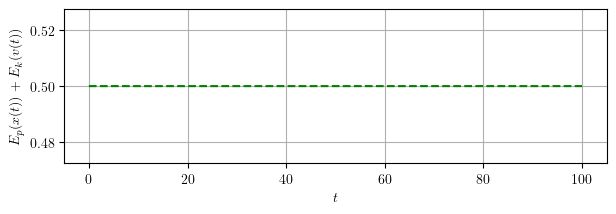

In [63]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

A=1
w=1
k=1
m=1

x = lambda t: A*np.cos(w*t)
v = lambda t: -A*w*np.sin(w*t)
a = lambda t: -w**2*x(t)

Ep = lambda x: (1/2)*k*x**2
Ek = lambda v: (1/2)*m*v**2

t0=0
tf=100
dt=10000
t = np.linspace(t0,tf,dt)

kwargs_1 = {
    'color': 'red',
    'linestyle': '-.'
}

kwargs_2 = {
    'color': 'green',
    'linestyle': '--'
}

fs = (7, 2)

fig, ax = plt.subplots(figsize=fs)

ax.plot(t, x(t))
ax.set_xlim([t0-10,tf+10])
ax.set_ylim([-2*A,2*A]);
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x(t)$')
ax.grid()

fig, ax = plt.subplots(1,2, figsize=fs, sharey=True)

ax[0].plot(t, v(t))
ax[0].set_ylim([-2*A*w,2*A*w])
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$v(t)$')

ax[1].plot(t, a(t))
ax[1].set_ylim([-2*A*w**2,2*A*w**2])
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$a(t)$')

[[ax.set_xlim([t0-10,tf+10]),ax.grid()] for ax in ax.ravel()]

fig, ax = plt.subplots(1,2, figsize=fs, sharey=True)

ax[0].plot(x(t), Ep(x(t)), **kwargs_1)
ax[0].set_xlabel(r'$x(t)$')
ax[0].set_ylabel(r'$E_p(x(t))$')

ax[1].plot(x(t), Ek(v(t)), **kwargs_2)
ax[1].set_xlabel(r'$x(t)$')
ax[1].set_ylabel(r'$E_k(x(t))$')

[[ax.set_xlim([min(x(t))*1.1,max(x(t))*1.1]),\
  ax.set_ylim([min(Ep(x(t)))-0.05,max(Ep(x(t)))*1.1]),\
  ax.grid()] for ax in ax.ravel()]

fig, ax = plt.subplots(figsize=fs)

ax.plot(t, Ep(x(t))+Ek(v(t)), 'g--')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$E_p(x(t))+E_k(v(t))$')
ax.grid()

plt.show()

**2.** Write a program that evals a function $f(x) = \sin(x) \ln(1x+1) \sinh(x)$ in the interval $[0,...,10]$. The function must receive the step $dx$ for the sucesive evaluations. 
The result must be written in a file of 3 columns, the first one is the value i of the counter of the cycle for, the second one is x and the third one is f(x). 
Make the same program but using numpy arrays properties. 



# Solution 2

In [64]:
f = lambda x: np.sin(x)*np.log(x+1)*np.sinh(x)
dx = 1

In [65]:
values = [[i,i+dx-1,f(i+dx-1)] for i in range(11)]
print(values)

[[0, 0, 0.0], [1, 1, 0.6854516566117282], [2, 2, 3.6231077939066294], [3, 3, 1.9598356553963283], [4, 4, -33.23984582674633], [5, 5, -127.49311067713298], [6, 6, -109.67496431296621], [7, 7, 749.0904203080738], [8, 8, 3240.065852088271], [9, 9, 3844.661585987705], [10, 10, -14366.824510963215]]


In [66]:
x = np.linspace(0,10,11)
fvec = np.vectorize(f)
values = np.stack((x,x,fvec(x)), axis=1)
print(values)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  6.85451657e-01]
 [ 2.00000000e+00  2.00000000e+00  3.62310779e+00]
 [ 3.00000000e+00  3.00000000e+00  1.95983566e+00]
 [ 4.00000000e+00  4.00000000e+00 -3.32398458e+01]
 [ 5.00000000e+00  5.00000000e+00 -1.27493111e+02]
 [ 6.00000000e+00  6.00000000e+00 -1.09674964e+02]
 [ 7.00000000e+00  7.00000000e+00  7.49090420e+02]
 [ 8.00000000e+00  8.00000000e+00  3.24006585e+03]
 [ 9.00000000e+00  9.00000000e+00  3.84466159e+03]
 [ 1.00000000e+01  1.00000000e+01 -1.43668245e+04]]


# Solution 3

**3.** Plot the series sine and cosine using 3 different values N ( N is the last term taken of the series ).  Comparing with the function sine and cosine, say which approximation, which value of N, is sufficient as an approximation. 


\begin{eqnarray*}
\sin(x) &=& \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1} \\
\cos(x) &=& \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n}
\end{eqnarray*}

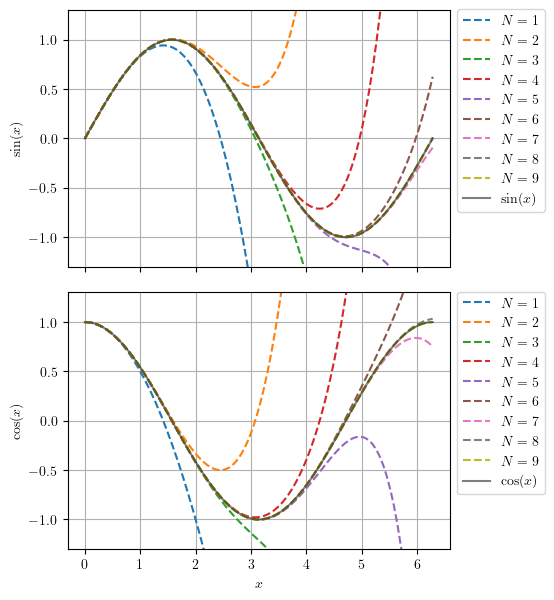

In [80]:
X = np.linspace(0,2*np.pi,100)
from scipy.special import factorial as fct
N_0 = range(1,10)
sin_n = lambda x,n: (-1)**n/fct(2*n+1)*x**(2*n+1)
cos_n = lambda x,n: (-1)**n/fct(2*n)*x**(2*n)
fig, ax = plt.subplots(2,1,figsize=(3,7),sharex=True)
for N in N_0:
    n = np.linspace(0,N,N+1)
    sin_N = [np.vectorize(sin_n)(x,n) for x in X]
    cos_N = [np.vectorize(cos_n)(x,n) for x in X]
    sin_Nn = [np.sum(sin_N[x]) for x in range(len(X))]
    cos_Nn = [np.sum(cos_N[x]) for x in range(len(X))]
    ax[0].plot(X,sin_Nn, label=f'$N={N}$', ls='--')
    ax[1].plot(X,cos_Nn, label=f'$N={N}$', ls='--')

ax[0].plot(X,np.sin(X), label=f'$\sin(x)$',c='black',alpha=0.5)
ax[0].set_ylabel(r'$\sin(x)$')

ax[1].plot(X,np.cos(X), label=f'$\cos(x)$',c='black',alpha=0.5)
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$\cos(x)$')

[[ax.set_ylim([-1.3,1.3]), ax.grid(),\
 ax.legend(bbox_to_anchor=(1,1.03))] for ax in ax.ravel()]

plt.subplots_adjust(right=1.4,hspace=0.1)
plt.show()

**4.** Write a program that calculates the factorial of a given number. 

# Solution 4

In [ ]:
fact = lambda n: np.prod(np.array(range(1,n+1)))
print(f'7!={fact(7)}')

basic-activity-solution.ipynb  figures/
